In [1]:
#Trataiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
#--------------
#Exploración de archivos
import sys
sys.path.append('../')
#--------------

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


#--------------

#Funciones personalizadas
from src import sp_abtest as sab
#--------------

In [2]:
df = pd.read_csv('../data/data_limpios_nonulos.csv')
df.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
922,923,b,2022-01-12,1,home,1718,chair,5,0.08,272.73,cash_on_delivery,standard,south,57.0,f,mobile,12,no,other,social,yes,59.290000
1459,1460,b,2022-03-23,0,home,1419,chair,0,0.05,0.00,no_conversion,no_conversion,east,50.0,m,desktop,2,no_conversion,chrome,organic,no,177.330000
796,797,b,2022-03-31,0,home,1797,sofa,0,0.15,0.00,no_conversion,no_conversion,south,66.0,f,desktop,16,no_conversion,chrome,organic,no,184.572138
1550,1551,b,2022-02-05,0,toys,1879,doll,0,0.26,0.00,no_conversion,no_conversion,east,25.0,f,mobile,21,no_conversion,safari,social,no,91.710000
1153,1154,b,2022-03-06,0,fashhion,1888,dress,0,0.04,0.00,no_conversion,no_conversion,south,22.0,f,mobile,3,no_conversion,other,email,no,46.970000


In [3]:
sab.exploracion_df_abtest(df,'group')

Los principlaes estadísticos de las columnas categóricas para el grupo A son:


,count,unique,top,freq
group,987,1,a,987
visit_date,987,90,2022-01-19,19
product_category,987,7,fashhion,165
product_name,987,28,jeans,49
payment_method,987,5,no_conversion,886
shipping_method,987,4,no_conversion,886
region,987,5,south,225
customer_gender,987,3,f,492
device,987,3,tablet,354
coupon_used,987,3,no_conversion,886


Los principlaes estadísticos de las columnas numéricas para el grupo A son:


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.00,518.500,983.000000,1498.50,2000.00
conversion,987.0,0.102330,0.303236,0.00,0.000,0.000000,0.00,1.00
product_id,987.0,1498.579534,293.157734,1001.00,1248.000,1495.000000,1754.50,1998.00
quantity,987.0,0.291793,0.972212,0.00,0.000,0.000000,0.00,5.00
discount,987.0,0.152396,0.085578,0.00,0.080,0.150224,0.23,0.30
total_value,987.0,41.642280,218.045865,0.00,0.000,0.000000,0.00,2899.50
customer_age,987.0,43.584600,15.263729,18.00,30.500,42.000000,56.00,70.00
session_duration,987.0,15.721378,8.697904,1.00,8.000,16.000000,23.00,30.00
price_knn,987.0,182.785984,209.210432,5.02,47.435,99.950000,232.75,998.88


--------------------------------------------------------------------------------------------------------------
Los principlaes estadísticos de las columnas categóricas para el grupo B son:


,count,unique,top,freq
group,1013,1,b,1013
visit_date,1013,90,2022-01-28,22
product_category,1013,7,fashhion,156
product_name,1013,28,science_fiction,58
payment_method,1013,5,no_conversion,867
shipping_method,1013,4,no_conversion,867
region,1013,5,east,217
customer_gender,1013,3,f,505
device,1013,3,mobile,357
coupon_used,1013,3,no_conversion,867


Los principlaes estadísticos de las columnas numéricas para el grupo B son:


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.00,489.00,1015.00,1501.00,1997.00
conversion,1013.0,0.144126,0.351391,0.00,0.00,0.00,0.00,1.00
product_id,1013.0,1504.463968,281.364999,1000.00,1266.00,1527.00,1736.00,1997.00
quantity,1013.0,0.448174,1.200514,0.00,0.00,0.00,0.00,5.00
discount,1013.0,0.148109,0.085847,0.00,0.07,0.15,0.22,0.30
total_value,1013.0,61.607828,249.343541,0.00,0.00,0.00,0.00,2904.07
customer_age,1013.0,42.693978,15.148251,18.00,29.00,42.00,56.00,70.00
session_duration,1013.0,15.547878,8.690150,1.00,8.00,16.00,23.00,30.00
price_knn,1013.0,186.312447,210.559922,5.34,45.85,111.97,230.83,995.65


--------------------------------------------------------------------------------------------------------------


# Métricas a estudiar
- conversion
- total_value
- session_duration
- quantity

Text(0.5, 1.0, 'Cantidad')

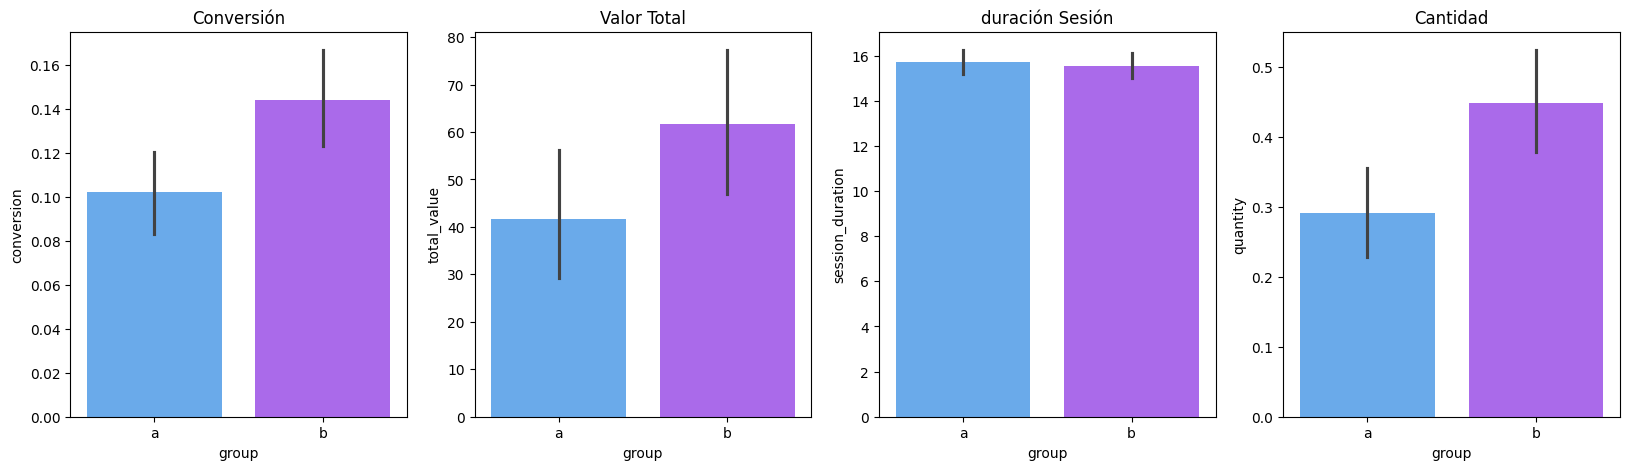

In [4]:
fig, axes = plt.subplots(nrows = 1,ncols = 4, figsize = (20,5))

sns.barplot(x = 'group', y ='conversion', data = df, ax = axes[0], hue= 'group', palette='cool')
axes[0].set_title('Conversión')

sns.barplot(x = 'group', y ='total_value', data = df, ax = axes[1], hue= 'group', palette='cool')
axes[1].set_title('Valor Total')

sns.barplot(x = 'group', y ='session_duration', data = df, ax = axes[2], hue= 'group', palette='cool')
axes[2].set_title('duración Sesión')

sns.barplot(x = 'group', y ='quantity', data = df, ax = axes[3], hue= 'group', palette='cool')
axes[3].set_title('Cantidad')


In [5]:
metricas = ['conversion', 'total_value', 'session_duration', 'quantity']

In [6]:
sab.normalidad(df,metricas)

Para la columna CONVERSION los datos NO siguen una distribución normal
Para la columna TOTAL_VALUE los datos NO siguen una distribución normal
Para la columna SESSION_DURATION los datos NO siguen una distribución normal
Para la columna QUANTITY los datos NO siguen una distribución normal


In [7]:
sab.homocedasticidad(df,'group', metricas)

Para la columna CONVERSIONlas varianzas no son homogéneas entre grupos, es decir, NO hay homocedasticidad
Para la columna TOTAL_VALUE las varianzas son homogéneas entre grupos, es decir, SI hay homocedasticidad
Para la columna SESSION_DURATION las varianzas son homogéneas entre grupos, es decir, SI hay homocedasticidad
Para la columna QUANTITYlas varianzas no son homogéneas entre grupos, es decir, NO hay homocedasticidad


In [8]:
sab.mannwhitneyu(df, 'group', metricas)

Para la métrica CONVERSION, las medianas son diferentes, es decir, SI hay diferencias significativas entre los grupos
Para la métrica TOTAL_VALUE, las medianas son diferentes, es decir, SI hay diferencias significativas entre los grupos
Para la métrica SESSION_DURATION, las medianas son iguales, es decir, NO hay diferencias significativas entre los grupos
Para la métrica QUANTITY, las medianas son diferentes, es decir, SI hay diferencias significativas entre los grupos
